In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [2]:
x = np.array([-1,0,1])
X = np.column_stack([[1,1,1],x,x**2])
print(X)

[[ 1 -1  1]
 [ 1  0  0]
 [ 1  1  1]]


In [3]:
y = np.array([1,0,1]).reshape(3,1)
print(y)

[[1]
 [0]
 [1]]


In [4]:
a = la.solve(X,y)
print(a)

[[0.]
 [0.]
 [1.]]


In [5]:
x = np.array([0,3,8])
X = np.column_stack([[1,1,1],x,x**2])
print(X)

[[ 1  0  0]
 [ 1  3  9]
 [ 1  8 64]]


In [6]:
y = np.array([6,1,2]).reshape(3,1)
print(y)

[[6]
 [1]
 [2]]


In [7]:
a = la.solve(X,y)
print(a)

[[ 6.        ]
 [-2.36666667]
 [ 0.23333333]]


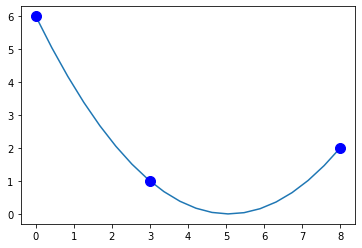

In [8]:
xs = np.linspace(0,8,20)
ys = a[0] + a[1]*xs + a[2]*xs**2
plt.plot(xs,ys,x,y,'b.',ms=20)
plt.show()

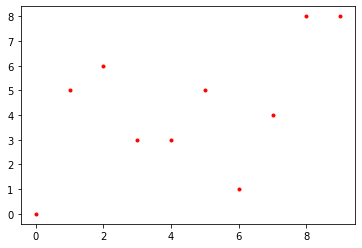

In [9]:
N = 10
x = np.arange(0,N)
y = np.random.randint(0,10,N)
plt.plot(x,y,'r.')
plt.show()

In [10]:
X = np.column_stack([x**k for k in range(0,N)])
print(X[:5,:5])

[[  1   0   0   0   0]
 [  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]]


In [11]:
X = np.vander(x,increasing=True)
print(X[:5,:5])

[[  1   0   0   0   0]
 [  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]]


In [12]:
a = la.solve(X,y)

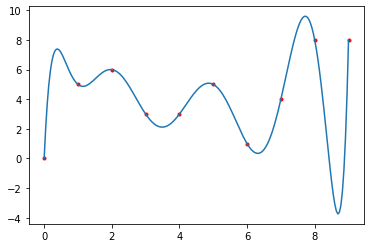

In [13]:
xs = np.linspace(0,N-1,200)
ys = sum([a[k]*xs**k for k in range(0,N)])
plt.plot(x,y,'r.',xs,ys)
plt.show()

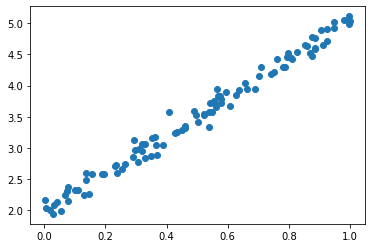

In [14]:
a0 = 2
a1 = 3
N = 100
x = np.random.rand(100)
noise = 0.1*np.random.randn(100)
y = a0 + a1*x + noise
plt.scatter(x,y);
plt.show()

In [15]:
X = np.column_stack([np.ones(N),x])
print(X.shape)

(100, 2)


In [16]:
X[:5,:]

array([[1.        , 0.92313723],
       [1.        , 0.05377756],
       [1.        , 0.57473955],
       [1.        , 0.32082994],
       [1.        , 0.2362353 ]])

In [17]:
a = la.solve(X.T @ X, X.T @ y)
print(a)

[1.98262043 3.06061403]


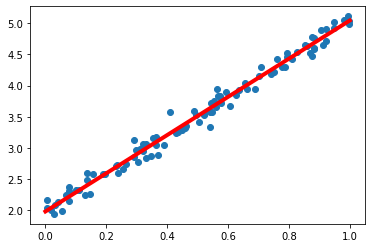

In [18]:
xs = np.linspace(0,1,10)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y);
plt.show()

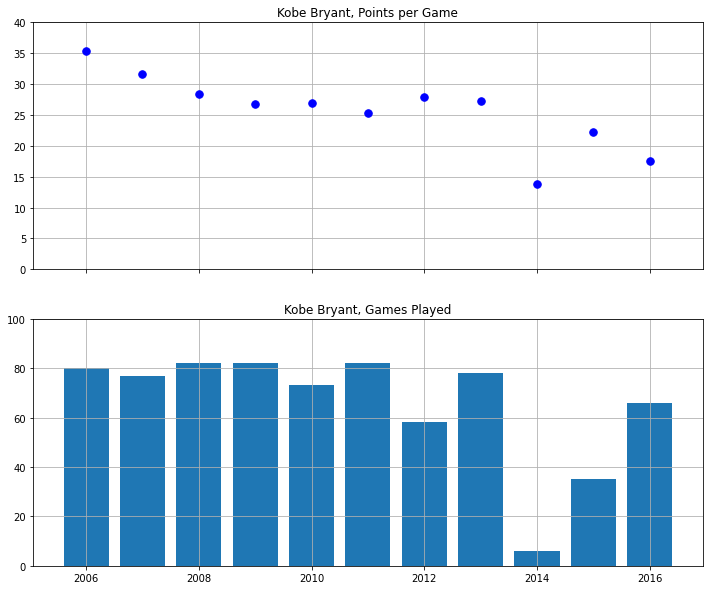

In [21]:
years = np.array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])
games = [80,77,82,82,73,82,58,78,6,35,66]
points = np.array([35.4,31.6,28.3,26.8,27,25.3,27.9,27.3,13.8,22.3,17.6])

fig = plt.figure(figsize=(12,10))
axs = fig.subplots(2,1,sharex=True)
axs[0].plot(years,points,'b.',ms=15)
axs[0].set_title('Kobe Bryant, Points per Game')
axs[0].set_ylim([0,40])
axs[0].grid(True)
axs[1].bar(years,games)
axs[1].set_title('Kobe Bryant, Games Played')
axs[1].set_ylim([0,100])
axs[1].grid(True)
plt.show()

In [22]:
years = np.array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016])
games = np.array([80,77,82,82,73,82,58,78,35,66])
points = np.array([35.4,31.6,28.3,26.8,27,25.3,27.9,27.3,22.3,17.6])

In [23]:
avg_games_per_year = np.mean(games)
print(avg_games_per_year)

71.3


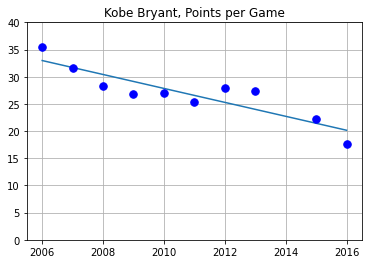

In [24]:
X = np.column_stack([np.ones(len(years)),years])
a = la.solve(X.T @ X, X.T @ points)
model = a[0] + a[1]*years

plt.plot(years,model,years,points,'b.',ms=15)
plt.title('Kobe Bryant, Points per Game')
plt.ylim([0,40])
plt.grid(True)
plt.show()

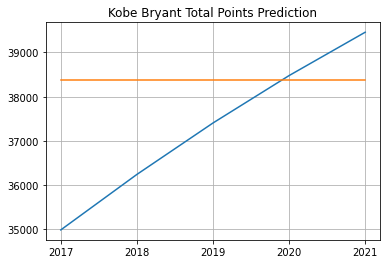

In [25]:
future_years = np.array([2017,2018,2019,2020,2021])
future_points = (a[0] + a[1]*future_years)*avg_games_per_year
total_points = 33643 + np.cumsum(future_points)
kareem = 38387*np.ones(len(future_years))

plt.plot(future_years,total_points,future_years,kareem)
plt.grid(True)
plt.xticks(future_years)
plt.title('Kobe Bryant Total Points Prediction')
plt.show()

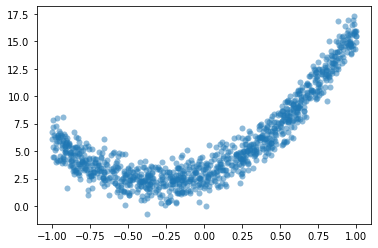

In [26]:
a0 = 3
a1 = 5
a2 = 8
N = 1000
x = 2*np.random.rand(N) - 1 # Random numbers in the interval (-1,1)
noise = np.random.randn(N)
y = a0 + a1*x + a2*x**2 + noise
plt.scatter(x,y,alpha=0.5,lw=0);
plt.show()

In [27]:
X = np.column_stack([np.ones(N),x,x**2])

In [28]:
a = la.solve((X.T @ X),X.T @ y)

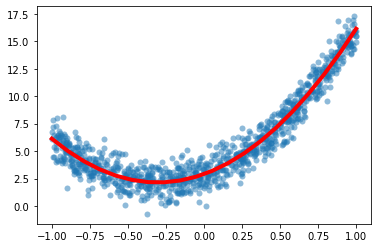

In [29]:
xs = np.linspace(-1,1,20)
ys = a[0] + a[1]*xs + a[2]*xs**2
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y,alpha=0.5,lw=0)
plt.show()

In [30]:
import networkx as nx

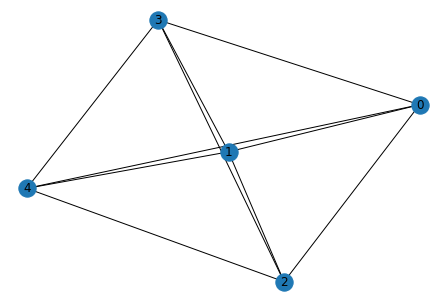

In [31]:
G = nx.complete_graph(5)
nx.draw(G,with_labels=True)

In [32]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]


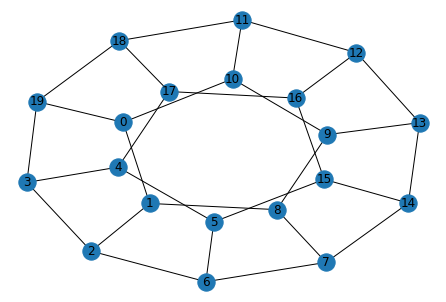

In [33]:
G = nx.dodecahedral_graph()
nx.draw(G,with_labels=True)

In [34]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


In [35]:
i = 0
j = 15
k = 1
Ak = A
while Ak[i,j] == 0:
    Ak = Ak @ A
    k = k + 1
print('Length of the shortest path is',k)

Length of the shortest path is 5


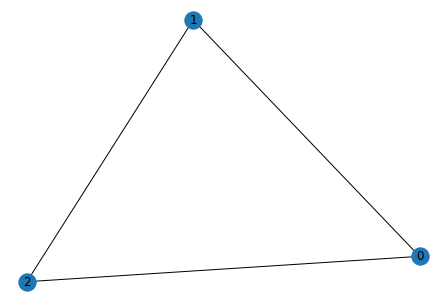

In [36]:
C3 = nx.complete_graph(3)
nx.draw(C3,with_labels=True)

In [37]:
A3 = nx.adjacency_matrix(C3).todense()
eigvals, eigvecs = la.eig(A3)
int(np.round(np.sum(eigvals.real**3)/6,0))

1

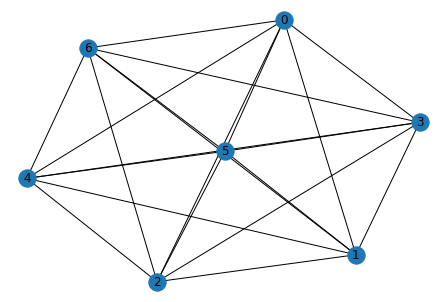

In [38]:
C7 = nx.complete_graph(7)
nx.draw(C7,with_labels=True)

In [39]:
A7 = nx.adjacency_matrix(C7).todense()
eigvals, eigvecs = la.eig(A7)
int(np.round(np.sum(eigvals.real**3)/6,0))

35

In [40]:
def triangles(M):
    A = (M + M.T)/2
    eigvals, eigvecs = la.eig(A)
    eigvals = eigvals.real
    return int(np.round(np.sum(eigvals**3)/6,0))

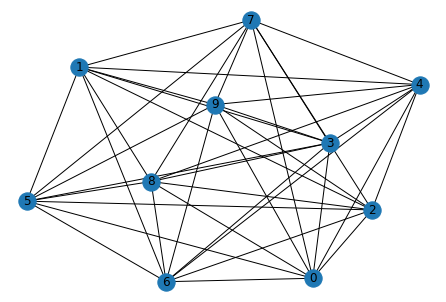

In [41]:
G = nx.turan_graph(10,5)
nx.draw(G,with_labels=True)

In [42]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 0 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [1 1 1 1 0 0 1 1 1 1]
 [1 1 1 1 0 0 1 1 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 0 0]]


In [43]:
triangles(A)

80

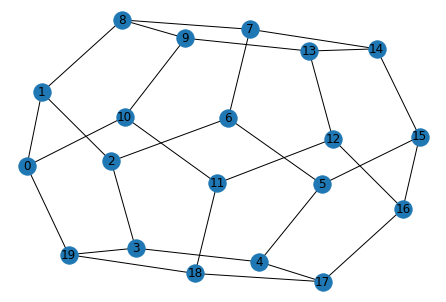

In [44]:
G = nx.dodecahedral_graph()
nx.draw(G,with_labels=True)

In [45]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


In [46]:
np.round(triangles(A),2)

0